## STEP-1 - Warm Up

In [7]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
print(hello)

tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)


#### Analyze the response and explain what tf.constant() command do

The tf.constant creates a constant tensor from a tensor-like object. The function accepts four arguments which can be tweaked to create the desired tensor. 

1. value : A constant value (or list) of output type dtype.
2. dtype : The type of the elements of the resulting tensor.
3. shape : Optional dimensions of resulting tensor.
4. name  : The name of the Tensor. 

We can pass in multidimensional numpy array , or we can even pass in the shape values (the dimensions) which convert the scalars to fill the requested shape.

## STEP-2 - Implement OCR code in Tensorflow

In [10]:
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Q1. Use same method that explain in lecture to show first 6 elements of the dataset. You should see:

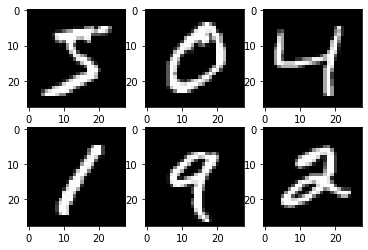

In [14]:
plt.subplot(231)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(232)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(233)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(234)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(235)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(236)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### Q2- Normalize the data by dividing the values by 255.

In [15]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [17]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dense(10)
])

# Run this model on our training data and see the result of the network
predictions= model(X_train[:1]).numpy()
predictions

array([[-0.80573344, -0.65794253,  0.07442356,  0.08313322, -0.8074064 ,
        -0.98657477, -0.46783835, -0.23647077,  0.25901243, -0.34967935]],
      dtype=float32)

In [18]:
# Adding activation function in the last node
tf.nn.sigmoid(predictions).numpy()

array([[0.30880043, 0.34120196, 0.5185973 , 0.5207713 , 0.30844343,
        0.27158916, 0.38512802, 0.44115627, 0.5643935 , 0.4134602 ]],
      dtype=float32)

In [22]:
# cross entropy as the loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [20]:
loss_fn(y_train[:1], predictions).numpy()

2.9831533

In [23]:
model.compile(optimizer='SGD',loss=loss_fn, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3796 - accuracy: 0.8958
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3606 - accuracy: 0.8998
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3460 - accuracy: 0.9025
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3344 - accuracy: 0.9056
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3250 - accuracy: 0.9075


In [29]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.3054 - accuracy: 0.9140


[0.3054186701774597, 0.9139999747276306]

### Q3- Add another layer with 128 nodes, increase the epochs to 10 and report the result. How much is the accuracy? (model.evaluate can tell you the accuracy). 

In [24]:
# Adding a new layer with 128 nodes 

new_model = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dense(10)
])

predictions_new= new_model(X_train[:1]).numpy()
predictions_new

# Adding activation function in the last node
tf.nn.sigmoid(predictions_new).numpy()

# cross entropy as the loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[:1], predictions_new).numpy()

# Increasing the epochs to 10

new_model.compile(optimizer='SGD',loss=loss_fn, metrics=['accuracy'])
new_model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2014 - accuracy: 0.3479
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7033 - accuracy: 0.6252
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0682 - accuracy: 0.7504
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7507 - accuracy: 0.8171
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.8503
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5064 - accuracy: 0.8686
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4519 - accuracy: 0.8795
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4156 - accuracy: 0.8876
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3896 - accuracy: 0.8925
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.369

In [30]:
# evaluating the model
new_model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.3482 - accuracy: 0.9013


[0.34821054339408875, 0.9013000130653381]

In [34]:
hist = new_model.fit(X_train, y_train, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3608 - accuracy: 0.8985 - val_loss: 0.3310 - val_accuracy: 0.9061
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3499 - accuracy: 0.9010 - val_loss: 0.3213 - val_accuracy: 0.9083
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3406 - accuracy: 0.9036 - val_loss: 0.3144 - val_accuracy: 0.9105
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3324 - accuracy: 0.9053 - val_loss: 0.3066 - val_accuracy: 0.9122
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3250 - accuracy: 0.9066 - val_loss: 0.3006 - val_accuracy: 0.9137
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3184 - accuracy: 0.9087 - val_loss: 0.2958 - val_accuracy: 0.9147
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3122 - accuracy: 0.9102 - val_loss: 0.2898 - val_accuracy:

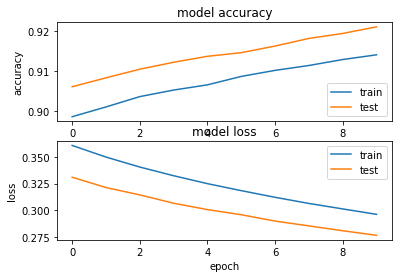

In [35]:
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [37]:
# dropout to remove fix the overfitting problem

model_new = tf.keras.models.Sequential([
 tf.keras.layers.Flatten(input_shape=(28, 28)),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dense(128, activation='sigmoid'),
 tf.keras.layers.Dropout(0.2),
 tf.keras.layers.Dense(10)])

### Q4- Now train the model again with adding stochastic gradient descent with batch size of 200. What do you expect to be changed? Speed or accuracy?

In [42]:
model_new.compile(optimizer='SGD',loss=loss_fn, metrics=['accuracy'])
model_new.fit(X_train,y_train,batch_size=200,epochs=10)

Epoch 1/10
300/300 [==============================] - 1s 5ms/step - loss: 0.9591 - accuracy: 0.7121
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 0.9201 - accuracy: 0.7248
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 0.8835 - accuracy: 0.7373
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.8537 - accuracy: 0.7449
Epoch 5/10
300/300 [==============================] - 1s 5ms/step - loss: 0.8243 - accuracy: 0.7518
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 0.7963 - accuracy: 0.7629
Epoch 7/10
300/300 [==============================] - 1s 5ms/step - loss: 0.7731 - accuracy: 0.7692
Epoch 8/10
300/300 [==============================] - 2s 5ms/step - loss: 0.7514 - accuracy: 0.7750
Epoch 9/10
300/300 [==============================] - 2s 5ms/step - loss: 0.7295 - accuracy: 0.7814
Epoch 10/10
300/300 [==============================] - 2s 6ms/step - loss: 0.7112 - accuracy: 0.7872

The Accuracy has went down from 92.12% to 78.72% 

## STEP-3 - Structured data

In [44]:
import pandas as pd

file = './pima-indians-diabetes.csv'
dataframe = pd.read_csv(file)
dataframe.head()

,ID,preg_no,plasma,diastolic,triceps,serum,mass,pedigree,age,diabete
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [45]:
dataframe.describe()

,ID,preg_no,plasma,diastolic,triceps,serum,mass,pedigree,age,diabete
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,384.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,192.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,384.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,576.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
y = dataframe['diabete']
X = dataframe.drop(['ID','diabete'], axis=1)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Neural network
model = Sequential()

model.add(Dense(12, input_dim=8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=20)


Epoch 1/25
31/31 [==============================] - 1s 28ms/step - loss: 0.3313 - accuracy: 0.3469 - val_loss: 0.3157 - val_accuracy: 0.3571
Epoch 2/25
31/31 [==============================] - 0s 7ms/step - loss: 0.3081 - accuracy: 0.3469 - val_loss: 0.2956 - val_accuracy: 0.3571
Epoch 3/25
31/31 [==============================] - 0s 5ms/step - loss: 0.2889 - accuracy: 0.3469 - val_loss: 0.2794 - val_accuracy: 0.3571
Epoch 4/25
31/31 [==============================] - 0s 13ms/step - loss: 0.2737 - accuracy: 0.3469 - val_loss: 0.2665 - val_accuracy: 0.3636
Epoch 5/25
31/31 [==============================] - 0s 6ms/step - loss: 0.2618 - accuracy: 0.4137 - val_loss: 0.2570 - val_accuracy: 0.4221
Epoch 6/25
31/31 [==============================] - 0s 5ms/step - loss: 0.2526 - accuracy: 0.4691 - val_loss: 0.2500 - val_accuracy: 0.5000
Epoch 7/25
31/31 [==============================] - 0s 9ms/step - loss: 0.2458 - accuracy: 0.5440 - val_loss: 0.2450 - val_accuracy: 0.5909
Epoch 8/25
31/31 [

### Applying the dropout  and adam optimizer

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Neural network
model = Sequential()

model.add(Dense(12, input_dim=8, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.2))


model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=20)

Epoch 1/25
31/31 [==============================] - 0s 6ms/step - loss: 0.2595 - accuracy: 0.6498 - val_loss: 0.2324 - val_accuracy: 0.6429
Epoch 2/25
31/31 [==============================] - 0s 4ms/step - loss: 0.2552 - accuracy: 0.6531 - val_loss: 0.2346 - val_accuracy: 0.6429
Epoch 3/25
31/31 [==============================] - 0s 3ms/step - loss: 0.2513 - accuracy: 0.6531 - val_loss: 0.2345 - val_accuracy: 0.6429
Epoch 4/25
31/31 [==============================] - 0s 3ms/step - loss: 0.2567 - accuracy: 0.6531 - val_loss: 0.2349 - val_accuracy: 0.6429
Epoch 5/25
31/31 [==============================] - 0s 4ms/step - loss: 0.2453 - accuracy: 0.6531 - val_loss: 0.2333 - val_accuracy: 0.6429
Epoch 6/25
31/31 [==============================] - 0s 4ms/step - loss: 0.2306 - accuracy: 0.6531 - val_loss: 0.2322 - val_accuracy: 0.6429
Epoch 7/25
31/31 [==============================] - 0s 3ms/step - loss: 0.2428 - accuracy: 0.6531 - val_loss: 0.2322 - val_accuracy: 0.6429
Epoch 8/25
31/31 [==

The accuracy didn't improve much and is still around 65.31 after the dropout and compiling with 'adam' optimizer.